In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import train_test_split


In [7]:
data = pd.read_csv("creditcard.csv")

In [8]:
print("### Data Preview")
print(data.head())

### Data Preview
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

In [9]:
print("### Data Shape")
print(data.shape)

### Data Shape
(284807, 31)


In [10]:
print("### Data Description")
print(data.describe())

### Data Description
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

In [11]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlier_fraction = len(fraud) / float(len(valid))
print("### Fraud Cases: {}".format(len(fraud)))
print("### Valid Transactions: {}".format(len(valid)))
print("### Outlier Fraction: {:.4f}".format(outlier_fraction))

### Fraud Cases: 492
### Valid Transactions: 284315
### Outlier Fraction: 0.0017


In [12]:
print("### Amount Details of Fraudulent Transactions")
print(fraud.Amount.describe())
print("### Amount Details of Valid Transactions")
print(valid.Amount.describe())


### Amount Details of Fraudulent Transactions
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
### Amount Details of Valid Transactions
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


### Correlation Matrix


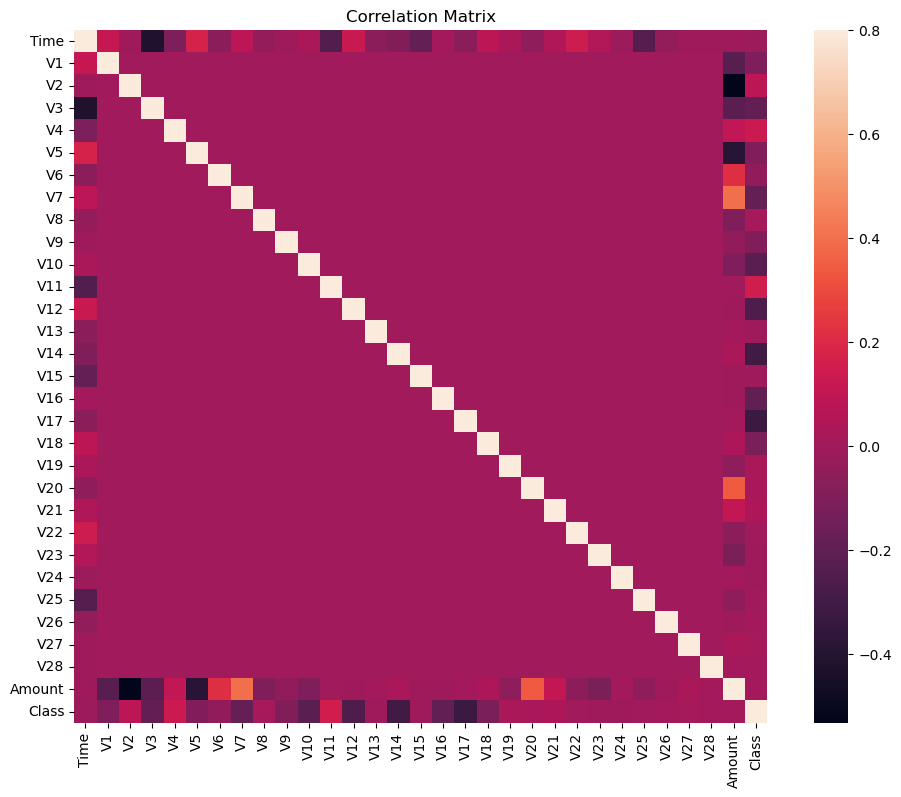

In [13]:
print("### Correlation Matrix")
corrmat = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title("Correlation Matrix")
plt.show()

In [14]:
X = data.drop(['Class'], axis=1)
Y = data["Class"]

In [15]:
print("### Shape of Features (X)")
print(X.shape)
print("### Shape of Target (Y)")
print(Y.shape)


### Shape of Features (X)
(284807, 30)
### Shape of Target (Y)
(284807,)


In [17]:
xData = X.values
yData = Y.values

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42)



In [19]:
print("### Training Random Forest Classifier")
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

### Training Random Forest Classifier


RandomForestClassifier()

In [20]:
yPred = rfc.predict(xTest)

In [21]:
print("### Model Evaluation")
acc = accuracy_score(yTest, yPred)
print("Accuracy: {:.4f}".format(acc))

### Model Evaluation
Accuracy: 0.9996


In [22]:
prec = precision_score(yTest, yPred)
print("Precision: {:.4f}".format(prec))

rec = recall_score(yTest, yPred)
print("Recall: {:.4f}".format(rec))

f1 = f1_score(yTest, yPred)
print("F1-Score: {:.4f}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("Matthews Correlation Coefficient: {:.4f}".format(MCC))



Precision: 0.9740
Recall: 0.7653
F1-Score: 0.8571
Matthews Correlation Coefficient: 0.8632


### Confusion Matrix


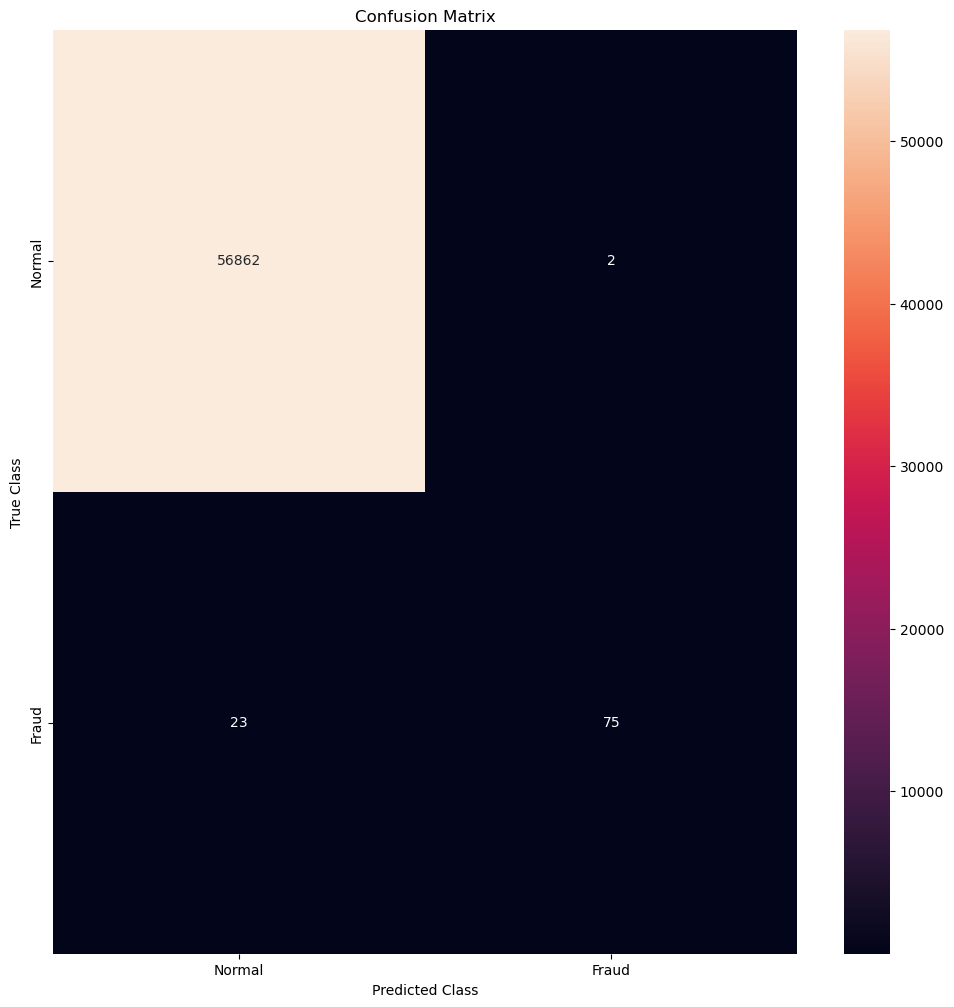

In [23]:
print("### Confusion Matrix")
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()